# An Introduction to Model-based Machine Learning – Homework
Submitted as part of BMI 500 Coursework at Emory University



* Name & Contact: Swati Rajwal (swati.rajwal@emory.edu)
* The question number you select to answer: **1**



# Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
!python --version

Python 3.10.12


# A) Model Implementation

In [2]:
def sir_model_with_peak(beta, gamma, S0, I0, R0, days):
    S = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)
    S[0] = S0
    I[0] = I0
    R[0] = R0
    for t in range(1, days):
        dS = -beta * S[t-1] * I[t-1]
        dI = beta * S[t-1] * I[t-1] - gamma * I[t-1]
        dR = gamma * I[t-1]
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR
    peak_day = np.argmax(I)
    peak_infected = I[peak_day]
    return S, I, R, peak_day, peak_infected

# B) SIR Model Simulation

In [3]:
#given in ques.
N=1000
S0=999
I0=1
R0=0
beta=0.0003
gamma=0.1
days=150

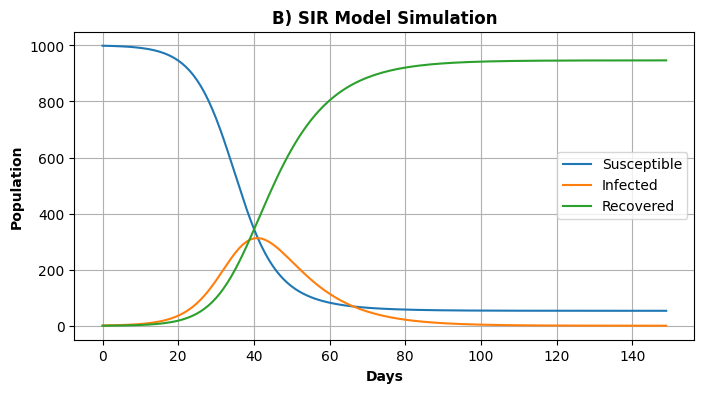

In [4]:
S, I, R, peak_day, peak_infected = sir_model_with_peak(beta, gamma, S0, I0, R0, days)
plt.figure(figsize=(8,4))
plt.plot(range(days), S, label='Susceptible')
plt.plot(range(days), I, label='Infected')
plt.plot(range(days), R, label='Recovered')
plt.xlabel('Days', fontweight='bold')
plt.ylabel('Population', fontweight='bold')
plt.title('B) SIR Model Simulation', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

# C) Analysis and Interpretation

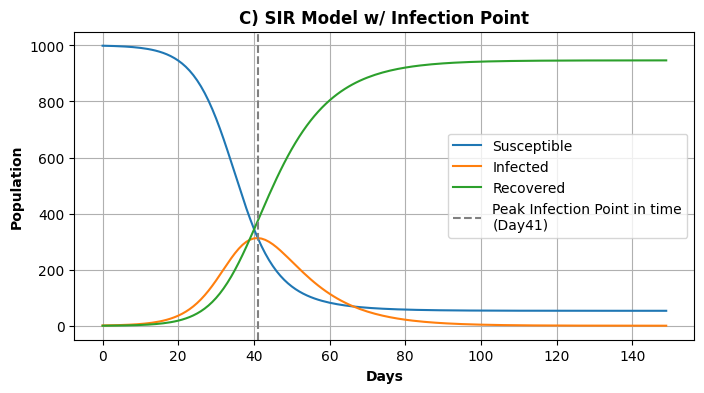

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(range(days), S, label='Susceptible')
plt.plot(range(days), I, label='Infected')
plt.plot(range(days), R, label='Recovered')
plt.axvline(peak_day, color='gray', linestyle='--', label=f'Peak Infection Point in time\n(Day{peak_day})')
plt.xlabel('Days', fontweight='bold')
plt.ylabel('Population', fontweight='bold')
plt.title('C) SIR Model w/ Infection Point', fontweight='bold')
plt.legend()
plt.grid()
plt.show()

In [9]:
# ii. Basic reproductive number R0
print(f"Basic Reproductive Number (R0): {beta/gamma}")

Basic Reproductive Number (R0): 0.0029999999999999996


# D) SEIR Model with Births and Deaths

In [6]:
# i.
def seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, days):
    S = np.zeros(days)
    E = np.zeros(days)
    I = np.zeros(days)
    R = np.zeros(days)
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0
    for t in range(1, days):
        dS = mu * N - beta * S[t-1] * I[t-1] - mu * S[t-1]
        dE = beta * S[t-1] * I[t-1] - (sigma + mu) * E[t-1]
        dI = sigma * E[t-1] - (gamma + mu) * I[t-1]
        dR = gamma * I[t-1] - mu * R[t-1]
        S[t] = S[t-1] + dS
        E[t] = E[t-1] + dE
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR
    return S, E, I, R

In [10]:
# ii.
E0=9
S0=990
sigma=0.2
mu=0.01
def plot_results(s, e, i, r, d):
  plt.figure(figsize=(10, 4))
  plt.plot(range(d), s, label='Susceptible')
  plt.plot(range(d), e, label='Exposed')
  plt.plot(range(d), i, label='Infected')
  plt.plot(range(d), r, label='Recovered')
  plt.xlabel('Days', fontweight='bold')
  plt.ylabel('Population', fontweight='bold')
  plt.title(f'D) SEIR Model Simulation for case when days = {d}', fontweight='bold')
  plt.legend()
  plt.grid()
  plt.show()
  plt.close()

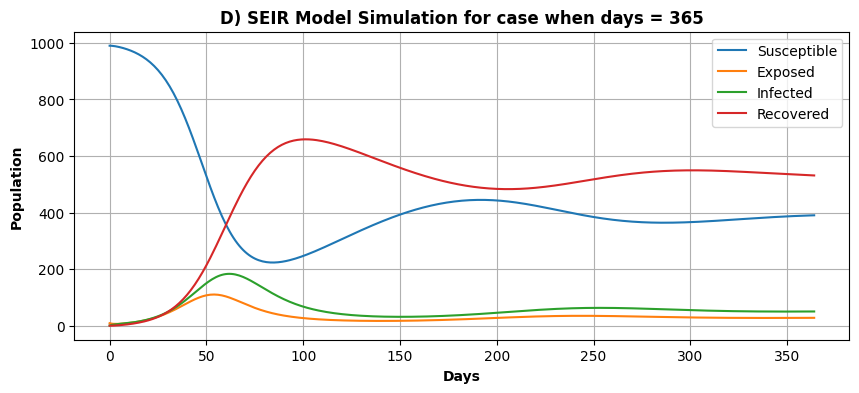

In [11]:
plot_results(*seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, 365), 365)

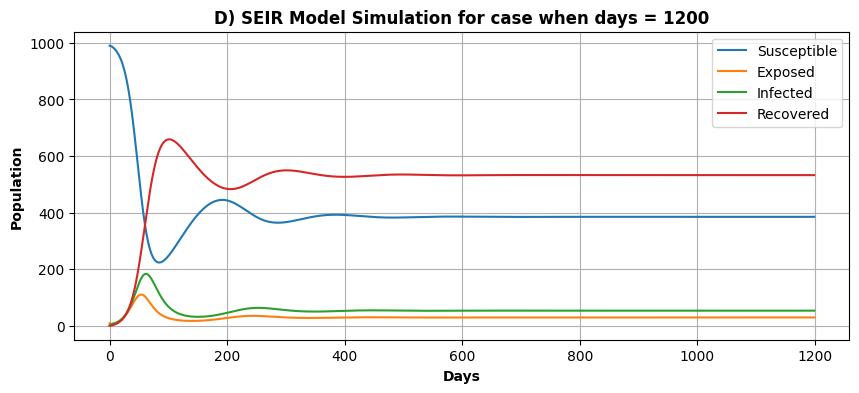

In [12]:
plot_results(*seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, 1200), 1200)

# E) Sensitivity Analysis

In [13]:
beta_values=[0.0001, 0.0003, 0.0004]
gamma_values=[0.05,0.1,0.2]

In [14]:
# i.
def plot_sensitivity_seir(days):
    fig, axes = plt.subplots(len(beta_values), len(gamma_values), figsize=(16, 8), sharex=True, sharey=True)
    fig.tight_layout(pad=4.0)
    lines = []
    labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
    for i, beta in enumerate(beta_values):
        for j, gamma in enumerate(gamma_values):
            S, E, I, R = seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, days)
            ax = axes[i, j]
            l1, = ax.plot(range(days), S)
            l2, = ax.plot(range(days), E)
            l3, = ax.plot(range(days), I)
            l4, = ax.plot(range(days), R)
            if i == 0 and j == 0:
                lines = [l1, l2, l3, l4]
            peak_infected=max(I)
            ax.set_title(f'β={beta:.4f}, γ={gamma:.2f} - Peak Infected: {peak_infected:.0f}')
            ax.grid()
    fig.text(0.5, 0.02, 'Days', ha='center', va='center', fontsize=16, fontweight='bold')
    fig.text(0.01, 0.5, 'Population', ha='center', va='center', rotation='vertical', fontsize=16, fontweight='bold')
    fig.legend(lines, labels, loc='upper center', ncol=4)
    plt.show()
    plt.close()

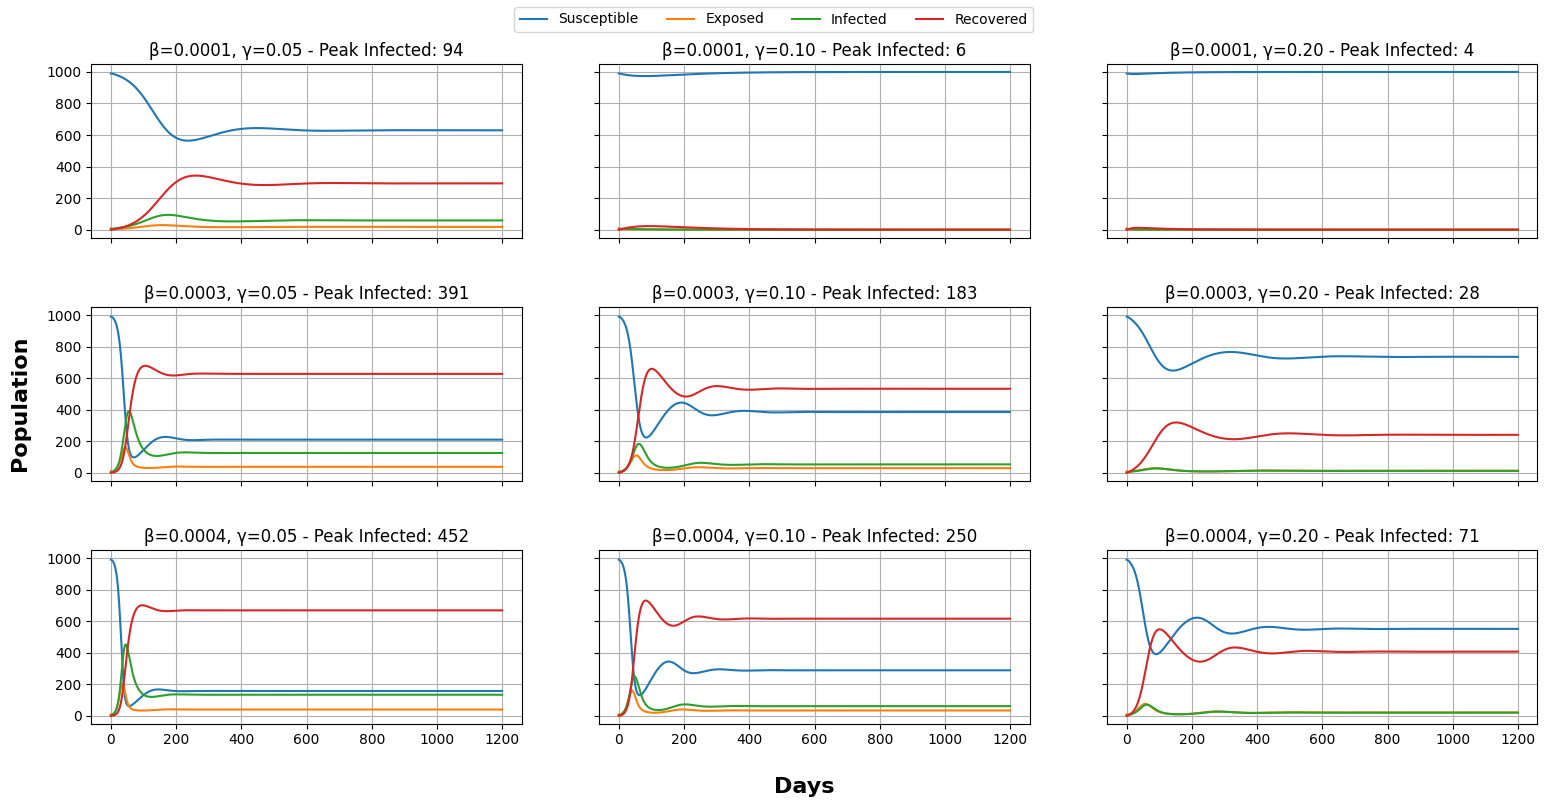

In [15]:
plot_sensitivity_seir(1200)

In [16]:
peak_infections = np.zeros((len(beta_values), len(gamma_values)))
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        S, E, I, R = seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, 365)
        print(f"Peak Infections for β={beta:.4f}, γ={gamma:.2f}: {max(I)}")
        peak_infections[i, j] = max(I)

Peak Infections for β=0.0001, γ=0.05: 94.08451286599718
Peak Infections for β=0.0001, γ=0.10: 5.873468741410926
Peak Infections for β=0.0001, γ=0.20: 4.135469593818965
Peak Infections for β=0.0003, γ=0.05: 391.0791877042647
Peak Infections for β=0.0003, γ=0.10: 183.44468815179926
Peak Infections for β=0.0003, γ=0.20: 27.527624420796858
Peak Infections for β=0.0004, γ=0.05: 451.9190662966736
Peak Infections for β=0.0004, γ=0.10: 250.182702773528
Peak Infections for β=0.0004, γ=0.20: 70.8743734495696


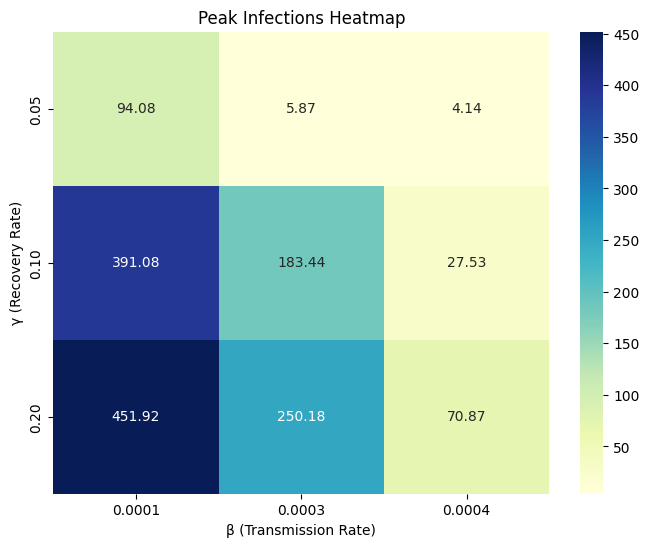

In [50]:
peak_infections = np.round(peak_infections, 2)
plt.figure(figsize=(8, 6))
sns.heatmap(peak_infections, annot=True, fmt=".2f", xticklabels=[f"{b:.4f}" for b in beta_values], yticklabels=[f"{g:.2f}" for g in gamma_values], cmap="YlGnBu")
plt.xlabel("β (Transmission Rate)")
plt.ylabel("γ (Recovery Rate)")
plt.title("Peak Infections Heatmap")
plt.show()
plt.close()

In [18]:
total_infections = np.zeros((len(beta_values), len(gamma_values)))
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        S, E, I, R = seir_model(beta, sigma, gamma, mu, S0, E0, I0, R0, N, 365)
        print(f"total Infections for β={beta:.4f}, γ={gamma:.2f}: {max(I)}")
        total_infections[i, j] = sum(I)

total Infections for β=0.0001, γ=0.05: 94.08451286599718
total Infections for β=0.0001, γ=0.10: 5.873468741410926
total Infections for β=0.0001, γ=0.20: 4.135469593818965
total Infections for β=0.0003, γ=0.05: 391.0791877042647
total Infections for β=0.0003, γ=0.10: 183.44468815179926
total Infections for β=0.0003, γ=0.20: 27.527624420796858
total Infections for β=0.0004, γ=0.05: 451.9190662966736
total Infections for β=0.0004, γ=0.10: 250.182702773528
total Infections for β=0.0004, γ=0.20: 70.8743734495696


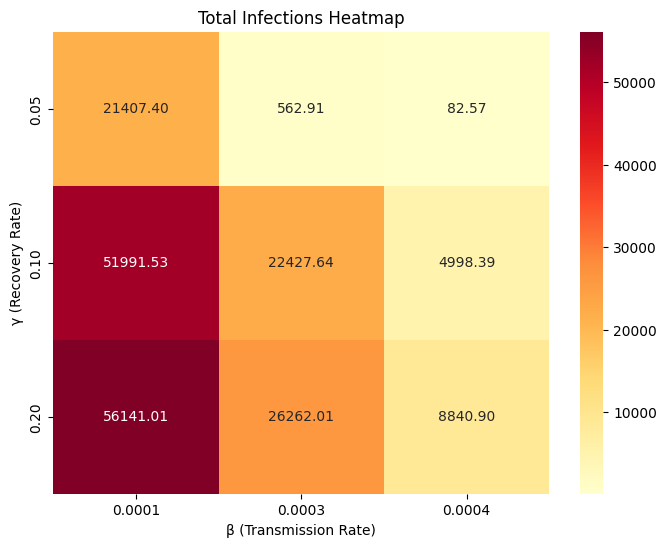

In [51]:
total_infections = np.round(total_infections, 2)
plt.figure(figsize=(8, 6))
sns.heatmap(total_infections, annot=True, fmt=".2f", xticklabels=[f"{b:.4f}" for b in beta_values], yticklabels=[f"{g:.2f}" for g in gamma_values], cmap="YlOrRd")
plt.xlabel("β (Transmission Rate)")
plt.ylabel("γ (Recovery Rate)")
plt.title("Total Infections Heatmap")
plt.show()
plt.close()